## **Practical Implementation of ANN with Admission dataset**

In [1]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#reading dataset
df = pd.read_csv('/content/admission_data.csv')

In [3]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
#all columns of data
columns = df.columns

In [5]:
columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
#removing unwanted space form column
columns = [feature.replace(" ",'' )for feature in columns]

In [7]:
df.columns = columns

In [8]:
df.columns

Index(['GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR', 'CGPA',
       'Research', 'ChanceofAdmit'],
      dtype='object')

In [9]:
#basic info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GREScore          500 non-null    int64  
 1   TOEFLScore        500 non-null    int64  
 2   UniversityRating  500 non-null    int64  
 3   SOP               500 non-null    float64
 4   LOR               500 non-null    float64
 5   CGPA              500 non-null    float64
 6   Research          500 non-null    int64  
 7   ChanceofAdmit     500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [10]:
#checking null values
df.isnull().sum()

GREScore            0
TOEFLScore          0
UniversityRating    0
SOP                 0
LOR                 0
CGPA                0
Research            0
ChanceofAdmit       0
dtype: int64

Observation: No null present in dataset

In [11]:
X = df.drop(columns=['ChanceofAdmit'],axis=1)
Y = df['ChanceofAdmit']

In [12]:
X.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [13]:
Y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: ChanceofAdmit, dtype: float64

In [14]:
X.shape

(500, 7)

In [15]:
Y.shape

(500,)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
#spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [18]:
scaler = StandardScaler()

In [19]:
#scaling the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Implementing ANN

In [20]:
#importing required libraries for ann
import tensorflow.keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [21]:
regressor = Sequential()

regressor.add(Dense(units = 7, activation= 'relu', input_dim = X_train.shape[1]))
regressor.add(Dense(units = 7, activation = 'relu'))
regressor.add(Dense(units=1, activation = 'linear' ))

In [22]:
regressor.compile(optimizer= 'adam', loss='mean_squared_error', metrics = ['mean_squared_error'])

In [23]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
history = regressor.fit(X_train, y_train, epochs=100,batch_size=15,  validation_split= 0.1, verbose = 1)

Epoch 1/100
21/21 [==============================] - 0s 11ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 2/100
21/21 [==============================] - 0s 11ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 3/100
21/21 [==============================] - 0s 12ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 4/100
21/21 [==============================] - 0s 11ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 5/100
21/21 [==============================] - 0s 9ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 6/100
21/21 [==============================] - 0s 12ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 7/100
21/21 [==========

In [29]:
Y_predict = regressor.predict(X_test)


6/6 [==============================] - 0s 2ms/step


In [30]:
from sklearn.metrics import r2_score

score = r2_score(y_test, Y_predict)

In [31]:
score

0.7862907609097085

In [32]:
history.history

{'loss': [0.004886189475655556,
  0.004967737942934036,
  0.004929723218083382,
  0.00491124764084816,
  0.004911139607429504,
  0.004830458201467991,
  0.004793852102011442,
  0.00482604606077075,
  0.004803019110113382,
  0.0048492345958948135,
  0.004816759377717972,
  0.004865111317485571,
  0.005183717235922813,
  0.004882457200437784,
  0.004731607623398304,
  0.0048510245978832245,
  0.004675393924117088,
  0.004670162685215473,
  0.004646196495741606,
  0.004776026587933302,
  0.0046237860806286335,
  0.005173198878765106,
  0.004990630783140659,
  0.004716015886515379,
  0.004620892461389303,
  0.004592971410602331,
  0.0045304205268621445,
  0.004528504330664873,
  0.004506930708885193,
  0.004493325483053923,
  0.00449747871607542,
  0.004449279047548771,
  0.004422857891768217,
  0.004445114638656378,
  0.00439533032476902,
  0.0043737879022955894,
  0.004358416423201561,
  0.004384151194244623,
  0.004313269164413214,
  0.00431830296292901,
  0.004340453539043665,
  0.0045

In [36]:
history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

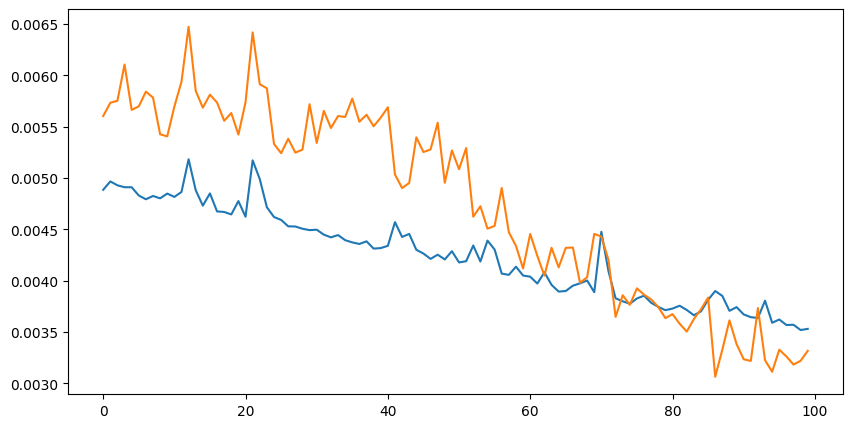

In [40]:
plt.figure(figsize = (10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [44]:
print(f"Real data of first 5 rows {y_test[0:5]}")

print('='*30)

print(f"Predicted data of first five rows {Y_predict[0:5]}")

Real data of first 5 rows 361    0.93
73     0.84
374    0.39
155    0.77
104    0.74
Name: ChanceofAdmit, dtype: float64
Predicted data of first five rows [[0.91212183]
 [0.7706642 ]
 [0.58266723]
 [0.67964274]
 [0.80843884]]
